# Plot TIF in Cartopy

We first load useful libraries

In [7]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import rasterio

We open the dataset

In [8]:
dat = rasterio.open(r"../Data/Lan_Nat.tif")
maparray = dat.read()[0]

We assign values to zero and flip the array upside down for accuracy

In [9]:
maparray[maparray==255]=0
maparray = np.flipud(maparray) 

We create a grid with the native longitudes and latitudes from the boundaries

In [10]:
loni = np.linspace(dat.bounds.left, dat.bounds.right,len(maparray[0]))
lati = np.linspace(dat.bounds.bottom, dat.bounds.top,len(maparray))
lons, lats = np.meshgrid(loni,lati)

We plot the variable

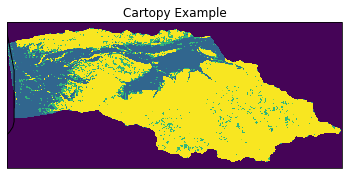

In [11]:
ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(lons, lats, maparray, 60,
             transform=ccrs.PlateCarree())
ax.coastlines()
plt.title('Cartopy Example')
plt.show()